# Chapter 5. 지도 학습: 회귀
지도 학습의 문제는 '회귀'와 '분류'의 문제로 나눌 수 있다. 회귀는 입력에 대해 연속적인 값을 대응시키는 문제이며, 분류는 입력에 대해 순서가 없는 클래스(라벨)을 대응시키는 문제이다. 
<br/><br/><br/>
# 5.1 1차원 입력 직선 모델
나이 x와 키 t가 세트로 된 데이터를 생각하자. <br/> 
<img src="img/510.png" width="400" align="left">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
N은 인원수를 나타내며, N=16이라고 가정하자. xn을 '입력 변수', tn을 '목표 변수(때상)'이라고 한다. n은 각 개인을 나타내는 데ㅣ터의 인덱스이다. 모든 데이터를 정리한 x를 '입력 데이터', t를 '목표 데이터'라고 부르기로 하자. 목적은 데이터베이스에 없는 사람의 나이에 대해 그 사람의 키 t를 예측하는 것이다.
<br/>
먼저 나이와 몸무게의 인공 데이터를 만들자. 어떻게 생성했는지는 이 장의 끝에서 알려준다.

In [2]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성------------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한
X_max = 30 # X의 하한 
X_n = 16 # X의 하한
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (b)


(A)에 의해 X에서 T를 결정하고 있다. (B)에서 생성한 데이터를 'ch_5_data.npz'에 저장한다.

In [5]:
# 리스트 5-1-(2)
(print(X))

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


반올림하는 np.round 함수를 사용해 깔끔하게 표시하자.

In [6]:
# 리스트 5-1-(3,4)
print(np.round(X,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


X와 T를 그래프로 표시하자.

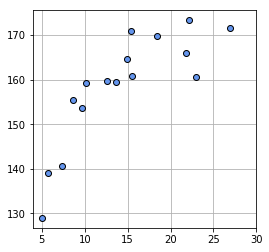

In [13]:
# 리스트 5-1-(5)
# 데이터 그래프 -----------------------------
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle = 'None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

<br/><br/><br/>
## 5.1.1 직선 모델
위의 플롯을 보면 에티터가 고르지 않기 때문에, 새로운 나이 데이터에 키를 정확히 맞추는 것을 불가하다. 그러나 어느 정도 오차를 허용한다면 주어진 데이터에서 직선을 긋는 것으로 그럴듯 하게 예측할 수 있을 것이다. 직선의 방정식은 다음과 같이 나타낼 수 있다. <br/>
<img src="img/511.png" width="250" align="left">
<br/><br/><br/><br/><br/>
기울기를 나타내는 w0와 절편을 나타내는 w1에 적당한 값을 넣으면, 다양한 위치와 기울기의 직선을 만들 수 있다. 이 수식은 입력 x에 y(x)를 출력하는 함수로 볼 수 있으므로, y(x)는 x에 대한 t의 예측지로 간주할 수 있다. 이 직선이 데이터에 부합하려면 w0와 w1을 어떻게 정할까?
<br/><br/><br/>
## 5.1.2 제곱 오차 함수
'데이터에 부합하도록' 다음과 같이 오차 J를 정의한다. <br/>
<img src="img/512.png" width="400" align="left">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
여기서 yn은 직선 모델에 xn을 넣었을 때의 출력을 나타낸다. J는 평균제곱 오차(Mean Sqaure erro, MSE)로, 이는 직선과 데이터 점의 차의 제곱의 평균이다. w0와 w1을 결정하면 그에 대한 평균 제곱 오차 J를 계산할 수 있다. 

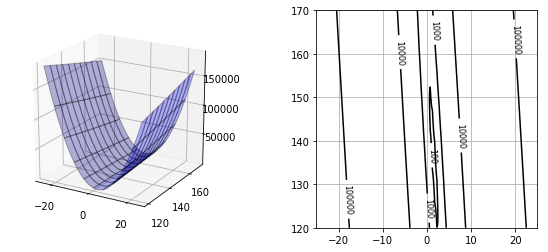

In [39]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 ----------------------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y-t)**2)
    return mse

# 계산 --------------------------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25,25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------------------------------------------
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.4)

ax = plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont = plt.contour(xx0,xx1, J, 30, colors='black', levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()

w0방향의 변화에 J가 크게 변하는 것을 알 수 있다. 기울기가 조금이라도 바뀌면 직선의 데이터 점에서 크게 어긋나기 때문이다. 그러나 3D 그래프는 w1방향의 변화를 알기 힘들다. 그래서 등고선의 그래프도 오른쪽에 표시했다. 아무래도 w0 = 3, w1=135 근처에서 J가 최솟값을 취할 것같다.

<br/><br/><br/>
##  5.1.3 매개 변수 구하기(경사 하강법)

그러면 J가 가장 작아지는 w0와 w1은 어떻게 구할까? 가장 간단하고 기본적인 방법은 경사하강법이다. 우선 초기 위치로 적당한 w0와 w1을 결정한다. 이는 J지형 위의 한 지점에 대응한다. 이 점에서의 기울기를 확인하고 J가 가장 감소하는 방향으로 w0와 w1를 조금만 진행한다. 이 절차를 여러 번 반복하여 최종적으로 J가 가장 작아지는 '그릇의 바닥'인 w0와 w1에 도착할 수 있다. 다음은 J의 기울기를 나타낸다. <br/>
<img src="img/513-1.png" width="500" align="left">
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>
w의 갱신 방법을 행렬표기로 나타내면 다음과 같다. <br/>
<img src="img/513-2.png" width="600" align="left">

여기서 α값은 학습률로, 크게 만들면 갱신은 커지지만 수습이 어려워지므로 적당히 줄여야 한다. 이것을 프로그램으로 구현하여 보자. 먼저 기울기를 계산하는 함수 dmse_line(x,t,w)를 만든다. 인수 데이터 x,t및 매개변수 w를 전달하면 w의 기울기 d_w0,d_w1을 돌려준다. 

In [26]:
# 리스트 5-1-(7)
# 평균 제곱 오차의 기울기 ----------------------
def dmse_line(x,t,w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y-t) * x)
    d_w1 = 2 * np.mean(y-t)
    return d_w0, d_w1

시험 삼아 w = [10, 165]의 기울기를 구해보자.

In [28]:
# 리스트 5-1-(8)
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


w0 방향의 기울기는 w1 방향의 기울기보다 더 큰 것을 알 수 있다. 이제 경사하강법을 fit_line_num(x,t)로 구현해보자. fit_line_num(x,t)는 데이터 x,t를 인수로 하여 mse_line을 최소화하는 w를 돌려준다.w는 초기 값 w_init = [10.0, 165.0]에서 시작하여 dsme_line에서 구한 기울기 w를 갱신하고 있다. 갱신 단계의 폭이 되는 학습 비율은 alpha = 0.001로 한다. w이 평평한 곳에 도달하면(즉 기울기가 충분히 작아지면), w의 갱신을 종료한다. 여기서는 기울기의 각 요소의 절대값이 eps=0.1보다 작아지면 for문에서 빠져 나오게 되어 있다. 프로그램을 실행하면 마지막으로 얻어진 w값 등을 표시하고 w의 갱신 내역을 그래프로 표시한다.

반복 횟수 13820
W = [1.539947, 136.176160]
dMSE = [-0.005794, 0.099991]
MSE = 49.027452


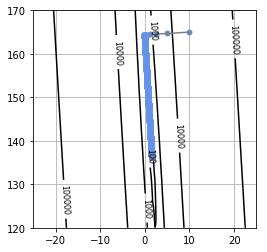

In [56]:
# 리스트 5-1-(9)
# 경사 하강법 -----------------------------------------------------------------
def fit_line_num(x,t):
    w_init = [10.0,165.0] # 초기 매개 변수
    alpha = 0.001 #학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i-1])
        w_i[i,0] = w_i[i-1,0] - alpha*dmse[0]
        w_i[i,1] = w_i[i-1,1] - alpha*dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대값
            break
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

# 메인 -------------------------------------------------------------------------
plt.figure(figsize=(4,4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
x0_range = [-25, 25]
x1_range = [120,170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors = 'black', levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

# 경사 하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X,T)

#결과보기
print('반복 횟수 {0}'.format(W_history.shape[0])) #행의 갯수 받기
print('W = [{0:.6f}, {1:.6f}]'.format(W0,W1))
print('dMSE = [{0:.6f}, {1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE = {0:.6f}'.format(mse_line(X, T, [W0,W1])))
plt.plot(W_history[:,0], W_history[:,1],'.-', color='gray', markersize=10, markeredgecolor = 'cornflowerblue')
plt.show()

위에서 구한 W0와 W1의 값을 직선 식에 대입하여 데이터 분포에 겹쳐서 그려보자.

w0=1.540, w1=136.176
SD=7.002 cm


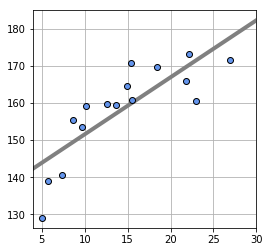

In [61]:
# 리스트 5-1-(!0)
# 선 표시 ---------------------------------------------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color = (.5,.5,.5),linewidth=4)

# 메인 ------------------------------------------------------------------------
plt.figure(figsize=(4,4))
W=np.array([W0,W1])
mse = mse_line(X,T,W)
print("w0={0:.3f}, w1={1:.3f}".format(W0,W1))
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

이 때의 평균 제곱 오차는 49.03cm^2였으므로, 직관적으로 오차가 얼마나 되는지 알기 위해 제곱근을 취한다. 그러면 7.00cm이다. 직선과 데이터의 차이는 대략 7.00cm라는 것이다. 이 평균 제곱 오차의 제곱급을 표준 편차(standard deviation,SD)라고 한다. <br/>
 주의할 점은 일반적으로 경사 하강법으로 구해지는 해는 어디까지나 극솟값이며, 전체의 최솟값을 아니라는 것이다. 만약 J가 곳곳에 움푹 들어간 모양을 하고 있으면, 최소 제곱법으로는 초기값 근처의 함몰 지점(극솟값)에 수렴하게 된다. J가 복잡한 모양을 하고 있을 때, 가장 깊은 함몰(최솟값)을 구하는 것은 어려운 문제이다. 다양한 초기 값에서 경사 하강법을 여러 번 시도하여, 구 중 가장 J가 작아진 지점을 최솟값으로 채용하는 근사적인 방법을 생각할 수 있다.

<br/><br/><br/>
## 5.1.4 선형 모델 매개 변수의 해석해
경사 하강법은 반복 계산에 의해 근사값을 구하는 수치 계산법이다. 이러한 풀이를 수치해라고 한다. 그러나 사실은 직선 모델의 경우에는 근사적인 해석이 아니라 방정식을 해결하여 정확한 해를 구할 수 있다. 이러한 풀이를 해석해라고 한다. 해석해를 사용하면 1회 계산만으로 최적의 w를 구할 수 있다.계산 시간도 바르고 정확하다. <br/>
 또한 해석해를 도출하면 문제의 본질을 잘 이해할 수 있고, 다차원 데이터에 대응하며, 곡선 모델로 확장하기 좋고, 커널법 등의 이해를 돕는다.
 <br/>
 그럼 다시 확인해 보자. 목표는 'J가 극소화되는 지점 w를 찾기'이다. 그 지점의 기울기는 0이므로, 기울기가 0이 되는 지점을 찾으면 된다.

<img src="img/514.png" width="600" align="left">

w0=1.558, w1=135.872
SD=7.001cm


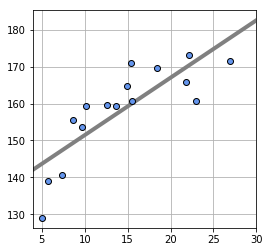

In [66]:
# 리스트 5-1-(11)
# 해석해 --------------------------------------------
def fit_line(x,t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0*mx
    return np.array([w0,w1])

# 메인 --------------------------------------------------
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0],W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

즉, 직선으로 피팅하면 해석해를 도출할 수 있으므로 경사 하강법을 사용할 필요가 없다.
<br/><br/><br/>
# 5.2 2차원 입력면 모델
다음은 입력이 2차원인 경우, x=(x0,x1)에 확장할 것이다. 1차원의 경우 xn은 나이만을 의미했지만, 이와 함께 몸무게 정보도 사용하여 키를 예측한다. 먼저 몸무게의 데이터를 인공적으로 만들자. 데이터에 포함되는 사람의 체질량 지수가 평균 23이라고 가정하여 다음 식을 이용한다.

    몸무게 = 23 * 키^2 / 100 + 노이즈
    
몸무게는 키의 제곱에 비례한다는 단순한 식이다. 원래 나이 x0로, 몸무게의 데이터를 x1으로 추가한다. 

In [71]:
#리스트 5-1-(12,13)
# 2차원 데이터 생성 -----------------------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(1) #난수를 고정
X1 = 23 * (T/100)**2 + 2 * np.random.rand(X_n)
X1_min = 40
X1_max = 75

print(np.round(X0,2))
print(np.round(X1,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[68.02 60.82 38.28 59.27 55.88 45.63 54.67 59.15 63.19 67.27 60.24 70.44
 58.78 69.42 44.47 64.62]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


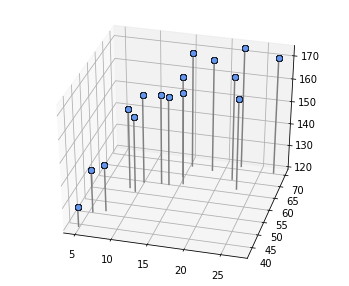

In [76]:
# 리스트 5-1-(14)
# 2차원 데이터의 표시 -----------------------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color= 'gray')
        ax.plot(x0,x1,t,'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)
        
        
# 메인 ---------------------------------------------------------
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

## 5.2.1 데이터의 표시방법
데이터의 번호는 이미 n으로 나타내었으므로, 벡터의 요소(0=나이, 1=몸무게 등) 번호는 m으로 나타내도록 하자.<br/>
<img src="img/521.png" width="500" align="left">

<br/>

## 5.2.2 면 모델

임의의 w에 대해 면을 그리는 함수 show_plane(ax, w)를 준비한다. ax라는 인수는 3차원 그래프를 그릴 때 필요한 묘사 대상 그래프의 id이다. 평균 제곱 오차를 계산하는 함수 mse_plane(x0,x1,t,w)도 만든다.

SD=14.228cm


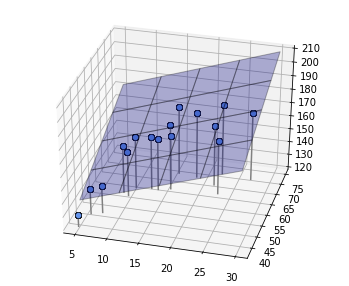

In [79]:
# 리스트 5-1-(15)
# 면의 표시 ----------------------------------------------------
def show_plane(ax,w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0] * px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')
    
#면의 MSE ------------------------------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y-t)**2)
    return mse

# 메인 ---------------------------------------------------------
plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1,projection='3d')
W = [1.5, 1, 90]
show_plane(ax,W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.show()

# 5.2.3 매개 변수의 해석해
데이터에 가장 적합한 w=[w0,w1,w2]를 구해보자. <br/>
<img src="img/523.png" width="700" align="left">

w0=-0.2, w1=1.5, w2=75.3
SD=0.500 cm


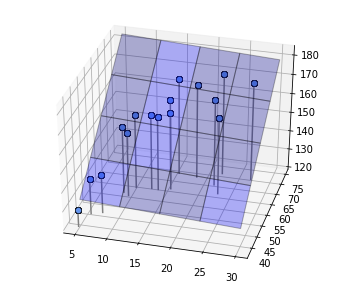

In [80]:
# 리스트 5-1-(16)
# 해석해 ------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


# 5.3 D차원 선형 회귀 모델 

<br/>

## 5.3.1 D차원 선형 회귀 모델

1차원 입력에서 다룬 직선 모델, 2차원 입력에서 다룬 면 모델은 모두 선형 회귀 모델이라는 같은 종류의 모델이다. 쉽게 살펴보기 위해 절편의 항을 포함하지 않는 모델로 생각해보자.
<img src="img/531.png" width="600" align="left">

<br/><br/>
## 5.3.2 매개 변수의 해석해
<img src="img/532-1.png" width="600" align="left">
<img src="img/532-2.png" width="600" align="left">
<img src="img/532-3.png" width="600" align="left">

## 5.3.3 원점을 지나지 않는 면에 대한 확장
이번에는 원점을 지나지 않는 면으로 확장하여 보자.

    y(x) = w0x0 + w1x1+ w2x2 = w0x0 + w1x1 + w2
    
이는 2차원벡터 x에 항상 1을 얻는 3차원의 요소 x2=1을 추가하여 x를 3차원 벡터라고 생각한 것이다. 이렇게 항상 1을 취하는 차원을 입력 데이터 x에 추가하고 적용하면 원점에 얽매이지 않는 면을 구할 수 있다.

# 5.4 선형 기저 함수 모델
곡선을 사용하여 나타내면 오차가 더 작아질 수 있다. 이번에는 곡선 모델을 생각해보자. 곡선을 나타내는 모델은 여러가지 종류가 있지만, 여기에서는 범용성이 높은 '선형 기저 함수 모델'을 소개한다. 기저 함수는 '바탕이 되는 함수'라는 뜻이다. 5.3절에서 소개한 선형 회귀 모델의 x를 기저함수로 대체해 여러 형태의 함수를 마드는 것이 선형 기저 함수 모델의 생각히다. 먼저 무엇을 기저 함수로 할지 선택할 필요가 있는데, 여기에서는 가우스 함수를 기저 함수로 선택하였다. <br/>
<img src="img/540-1.png" width="400" align="left">

In [2]:
# --- 리스트 5-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 로드 ----------------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [3]:
def gauss(x, mu, s):
    return np.exp(-(x-mu)**2 / (2 * s**2))

4개의 가우스 함수(M = 4)를 나이의 범위 5~30으로 일정 간격으로 배치하여 표시하자. s는 인접한 가우스 함수 중심 사이의 거리로 한다.

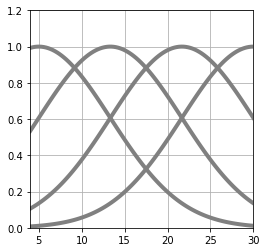

In [8]:
# 리스트 5-2-(3)
# 메인 --------------------------------
M=4
plt.figure(figsize=(4,4))
mu = np.linspace(5,30,M)
s= mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=4)
plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()

왼쪽에서 순서대로 Φ0(x),Φ1(x),Φ2(x),Φ3(x)라고 부르는 것으로 하자. 이들에 각각 매개변수 w0, w1, w2, w3을 곱해 모두 합한 함수를 다음과 같이 표기한다.

    y(x,w) = w0Φ0(x) + w1Φ1(x) + w2Φ2(x) + w3Φ3(x) + w4
    
이것이 M=4의 선형 기저 함수 모델이다. 매개 변수 w를 '가중치 매개 변수'라고 한다. 마지막 w4, 즉 wM은 곡선 상하의 평행 이동을 조절하는 중요한 것이지만, 다른 매개 변수와 달리 Φj(x)가 곱해지지 안않았다. 그래서 다른 매개 변수와 취급이 다르다. 항상 1을 출력하는 Φ4(x)=1이라고 하는 더미 기초 함수를 추가할 수 있다.
    

<img src="img/540-2.png" width="600" align="left">

In [15]:
# 리스트 5-2-(4)
# 선형 기저 함수 모델 ----------------------------------------------------
# y(x,w) = w0Φ0(x) + w1Φ1(x) + w2Φ2(x) + w3Φ3(x) + w4
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0인 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x,mu[j],s)
    y = y + w[m]
    return y

In [16]:
# 리스트 5-2-(5)
# 선형 기저 함수 모델 MSE ------------------------------------------------
def mse_gauss_func(x,t,w):
    y = gauss_func(w,x)
    mse = np.mean((y-t)**2)
    return mse

In [11]:
# 리스트 5-2-(6)
# 선형 기저 함수 모델 정확한 해 ---------------------------------------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5,30,m)
    s = mu[1] - mu[0]
    n = x.shape[0] #데이터 몇 개인지
    psi = np.ones((n,m+1))
    for j in range(m):
        psi[:,j] = gauss(x,mu[j],s) 
psi_T = np.transpose(psi)

b = np.linalg.inv(psi_T.dot(psi))
c = b.dot(psi_T)
w = c.dot(t)
return w          

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98cm


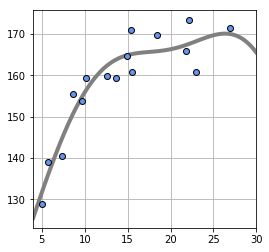

In [37]:
# 리스트 5-2-(7)
# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('W=' + str(np.round(W,1)))
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

선형 기저 함수 모델의 피팅 결과를 나타냈다. 항상 1을 출력하는 더미 함수와 4개의 가우스 기저 함수를 합한 결과이다. 오차의 표준 편차는 3.98cm로, 직선 모델 때의 오차 7.00cm보다 훨씬 줄어 들었다.
<br/><br/><br/>
# 5.5 오버피팅의 문제
기저 함수의 수 M은 어떻게 정할까? M을 충분히 크게 하면 어떤 데이터에도 잘 피팅될까? M=2,4,7,9의 선형 기저 함수 모델을 사용하여 피팅을 시도해보자. 

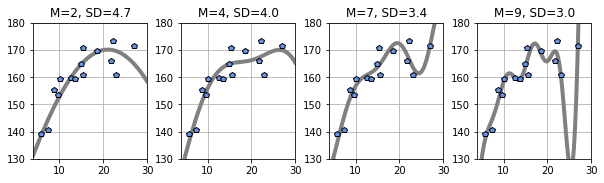

In [35]:
# 리스트 5-2-(8)
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
M = [2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M), i+1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='p', linestyle='None', color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min,X_max)
    plt.grid(True)
    plt.ylim(130,180)
    mse = mse_gauss_func(X,T,W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

좀더 정략적으로 M=2에서 9까지의 SD를 계산하고 플롯해보자.

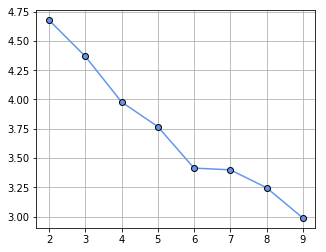

In [33]:
# 리스트 5-2-(9)
plt.figure(figsize=(5,4))
M = range(2,10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X,T,M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X,T,W))
plt.plot(M, mse2, marker='o', color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()

M이 증가할수록 선형 기저 함수 모델은 작은 곡선도 표현할 수 있게 되므로 곡선은 데이터 점에 근접하게 되고, 오차(SD)는 점점 감소한다. 그러나, 데이터 점이 없는 곳에서는 심하게 뒤틀려 버린다. 데이터 점의 오차는 작아져도, 새 데이터의 예측은 확실히 나빠진다는 뜻이다. 이러한 모델의 행동을 과적합(over-fitting)이라고 한다. <br/>
 그렇다면 최적의 M은 어떻게 찾으면 좋을까? 데이터 X와 t의 4분의 1을 test data로, 나머지 4분의 3을 training data로 나누자. 그리고 모델 매개 변수 w는 훈련 데이터만을 사용하여 최적화한다.그리고, 훈련에 이용하지 않은 미지의 데이터에 대한 예측 오차로 M을 평가해보자. 이 방법을 홀드 아웃(Holdout) 검증이라고 한다.  

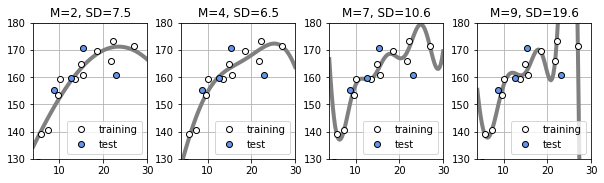

In [38]:
# 리스트 5-2-(10)
# 훈련 데이터와 테스트 데이터 -------------------------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

# 메인 ------------------------------------------------------
plt.figure(figsize=(10,2.5))

plt.subplots_adjust(wspace=0.3)
M = [2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker = 'o', linestyle='None', color='white', markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker = 'o', linestyle='None', color='cornflowerblue', markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min,X_max)
    plt.ylim(130,180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

정량적으로 확인해 보자.

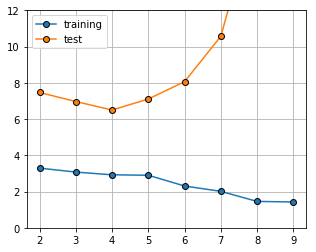

In [56]:
# 리스트 5-2-(11)
plt.figure(figsize=(5,4))
M = range(2,10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker = 'o', linestyle='-', markeredgecolor='black', label='training')
plt.plot(M, mse_test, marker = 'o', linestyle='-', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0,12)
plt.grid(True)
plt.show()

M이 늘어나면 훈련데이터의 오차는 평이하게 감소하지만, 테스트 데이터의 오차는 M=4까지 내려간 뒤 M=5부터 증가하고 있다. 즉, "M=5에서 오버피팅이 일어나고 있다."라고 말할 수 있다. 결과적으로 이번 홀드 아웃 검증에서는 M=4의 경우가 가장 데이터에 적합하다는 결론이 되었다.
<br/>
그러나, 이는 테스트 데이터에서 어떤 데이터 점을 선택하느냐에 의존한다. 이러한 문제점을 줄이기 위하여 교차 검증(Cross-Validation)방법을 사용한다. 다양한 분할에서 오차를 내고 평균을 계싼하는 방법이다. 데이털르 분할하는 종류의 개수로 K 겹 교차 검증(K-hold cross-validation)으로 부르기도 한다.

<br/>
<img src="img/550.png" width="700" align="left">

<br/> 
먼저 데이터 X와 t를 K개로 분할하여 첫번째 데이터를 테스트 데이터로, 나머지를 훈련 데이터로 한다. 훈련 데이터로부터 모델 M의 매개 변수를 구하고, 이 매개 변수를 사용하여 테스트 데이터에서 평균 제곱 오차를 계산한다. 마찬가지로 두 번째 데이터를 테스트 데이터로 삼고, 나머지를 훈련 데이터로 하여 테스트 데이터의 오차를 계산한다. 이처럼 절차를 K회 반복하고 마지막에 K개의 평균 제곱 오차의 평균을 계산하여 이 숫자를 이 M의 평가값으로 한다.

In [53]:
# 리스트 5-2-(12)
# k겹 교차 검증 --------------------------------------------------------
def kfold_gauss_func(x,t,m,k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0,k):
        x_train = x[np.fmod(range(n), k) != i]  # (A) np.fmod(n,k)는 n을 k로 나눈 나머지를 출력한다.
        t_train = t[np.fmod(range(n), k) != i] # (A)
        x_test = x[np.fmod(range(n), k) == i] # (A)
        t_test = t[np.fmod(range(n), k) == i] # (A)
        wm = fit_gauss_func(x_train,t_train,m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test
        

(A)에서 사용되는 함수 **np.fmod(n,k)**는 n을 k로 나눈 나머지를 출력한다. n을 range(n)으로 하면 0부터 k-1까지를 반복하는 n개의 리스트를 얻을 수 있다.

In [47]:
# 리스트 5-2-(13)
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

**kfold_gauss_func(x,t,m,k)**를 사용해보자.

In [54]:
# 리스트 5-2-(14)
M = 4
K = 4
kfold_gauss_func(X,T,M,K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782012,  18.30921743,  47.52459642]))

위쪽이 각각의 분할에서 훈련 데이터의 평균 제곱 오차이며, 아랫쪽이 테스트 데이터에서 평균 제곱 오차이다. **khold_gauss_func**함수를 사용하여 분할 수를 최대의 16으로 하고, 2에서 7까지의 M으로 오차의 평균을 계산하여 플롯한다.

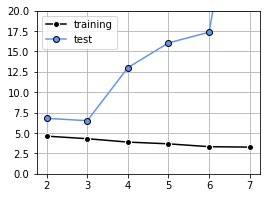

In [57]:
# 리스트 5-2-(15)
M = range(2,8)
K = 16
Cv_Gauss_train = np.zeros((K,len(M)))
Cv_Gauss_test = np.zeros((K,len(M)))
for i in range(0,len(M)):
    Cv_Gauss_train[:,i], Cv_Gauss_test[:,i] = kfold_gauss_func(X,T,M[i],K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0)) # axis=0은 열 연산, axis=1은 행 연산
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

plt.figure(figsize=(4,3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-', color='k', markeredgecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-', color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0,20)
plt.grid(True)
plt.show()

M=3일 때, 테스트 데이터에서의 오차가 가장 적은 것을 알 수 있다. 즉, LOOCV(leave-one-out cross-validation)에서는 M=3이 가장 적합하다는 결론이 나왔다. 이 결과는 홀드 아웃 검증과는 다르지만, 그보다 신뢰할 수 있는 결과라고 말할 수 있다. 교차 검증은 어디까지나 M을 구하기 위한 방법이며, 모델 매개 변수 w를 구하는 용도가 아니다. 이제 M=3이 최적임을 알고 있으므로, 그 모델의 매개 변수 w를 모든 데이터를 사용해 마지막으로 계산한다. 

SD=4.37cm


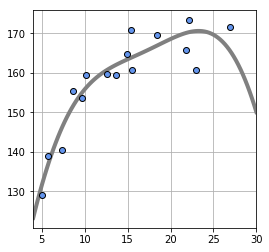

In [59]:
# 리스트 5-2-(16)
M = 3
plt.figure(figsize=(4,4))
W = fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min,X_max])
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

이번 테스트 데이터 (N=16)처럼 데이터 수가 적은 경우에는 교차 검증이 유용하다. 그러나 데이터 수가 많으면 교차 검증은 계산에 시간이 많이 걸린다. 이 경우에는 홀드 아웃 검증을 사용하면 좋을 것이다. 데이터 수가 크면 홀드 아웃 검증 결과가 교차 검증과 비슷하게 된다.
<br/><br/><br/>
# 5.6 새로운 모델의 생성
선형 기저 함수 모델을 도입하여 데이터와의 오차가 많이 개선되었으나, 25세가 되면 갑자기 그래프가 급격히 내려간다. 25세가 되면 갑자기 키가 줄어든다는 것은 우리의 상식과 맞지 않는다. 이것은 30세 주위의 데이터가 충분하지 않았기 때문에 일어났다. '키는 나이가 들면서 점차 커지고 일정한 곳에서 수렴한다'는 지식을 모델에 추가하려면 어떻게 하면 될까? <br/>
 바로 그 지식에 해당하는 모델을 만들면 된다. 나이 x가 증가함에 따라 키가 점차 증가하고 결국에는 일정한 값으로 수렴하는 함수를 만든다.
 
     y(x) = w0 - w1*exp(-w2x)
     
 w0, w1, w2는 모두 양의 값을 취하는 매개 변수이다. 이 함수를 '모델 A'로 부르기로 하자. <br/>
 x가 증가하면 exp(-w2x)는 0에 접근한다. 그 결과 1항의 w0만 값을 갖게 된다. 즉, x가 증가하면 y는 w0에 가까워진다. w0는 수렴하는 값을 결정하는 매개변수이다. w1은 그래프의 시작점을 결정하는 매개 변수 이며(w0보다 w1만큼 떨어진 지점에서 그래프가 시작된다.), w2는 그래프의 기울기를 결정하는 매개 변수로 되어 있다. <br/><br/>
 그럼 데이터에 맞는 매개 변수 w0,w1,w2,를 구하자. 지금까지와 동일한 방식으로 평균 제곱 오차 J가 최소가 되도록 w0,w1,w2를 선택한다. <br/>
 지금까지 경사 하강법을 사용하여 수치적으로 w를 구하는 방법과, 해석적으로 도출하는 방법을 소개하였으나, 여기에서는 전자의 '수치 해석'의 라이브러리를 사용하여 찾아보자.
<br/>
여기에서는 파이썬의 **scipy.optimize**에 포함된 **minimize**함수를 사용하여 최적 매개 변수를 구해본다. 이 함수는 최솟값을 구하는 함수와 매개 변수의 초기 값만 주면, 함수의 미분을 주지 않아도 매개 변수의 극솟값을 출력한다.

In [60]:
# 리스트 5-2-(17)
# 모델 A -------------------------------------------------
def model_A(x,w):
    y = w[0] - w[1] * np.exp(-w[2]*x)
    return y

# 모델 A 표시 --------------------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb,w)
    plt.plot(xb,y,c=[.5,.5,.5], lw=4)

# 모델 A의 MSE -------------------------------------------
def mse_model_A(w,x,t):
    y = model_A(x,w)
    mse = np.mean((y-t)**2)
    return mse

In [61]:
# 리스트 5-2-(18)
# 최적화
from scipy.optimize import minimize

# 모델 A의 매개 변수 최적화 -------------------------------
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x,t), method="powell") #(A) mse_model_A(w,x,t)를 최소화하는 w를 계산
    return res1.x

(A)의 첫 번째 인수는 최소화할 목표 함수이며, 두 번째 인수는 w의 초기값, 세 번째 인수는 목표 함수 mse_model_A(w,x,t)를 최적화하는 매개 변수 w이외의 인수인 x,t이다. 옵션으로는 method를 "powell"로 지정하여 구배를 사용하지 않는 최적화 방법인 파웰 알고리즘을 지정한다. 그러면 최적화 함수를 움직여보자.

w0=169.0, w1=113.7, w2=0.2
SD=3.86cm


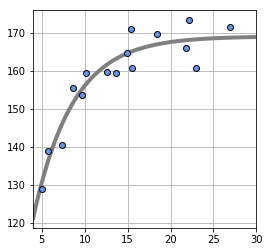

In [62]:
# 리스트 5-2-(!9)
# 메인 -----------------------------------------------------------
plt.figure(figsize=(4,4))
W_init = [100,0,0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0],W[1],W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse = mse_model_A(W,X,T)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

오차의 SD = 3.86cm로, 직선 모델 때의 오차 7.00cm보다 훨씬 적으며, M=3의 선형 기저 함수 모델의 4.32cm에 비해서도 낮은 값이 되었다.
<br/><br/><br/>
# 5.7 모델의 선택
어떤 모델이 더 좋을지, 모델 간의 비교는 어떻게 할까? 어쩌면 5.6절에서 설명한 모델 A보다 더 좋은 모델 B가 생각날지도 모른다. <br/>
모델 간의 비교에도 선형 기저 함수의 모델 M을 결정할 때와 같은 생각인, '미지의 데이터에 대한 예측 정확도로 평가한다'는 사고 방식이 유효하다. 즉, 홀드 아웃 검증과 교차 검증 모델로 모델의 좋고 나쁨을 평가할 수 있다. <br/>
 다음에서 모델 A의 LOOCV를 실시하여, 이전에 나타낸 선형 기저 함수 모델의 결과와 비교해 보자.

Gauss(M=3) SD=6.51cm
Model A SD=4.72cm


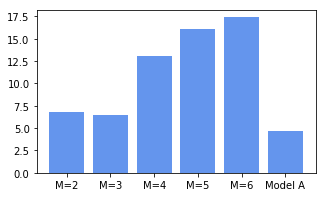

In [75]:
# 리스트 5-2-(20)
# 교차 검증 model_A------------------------------------------------------
def kfold_model_A(x,t,k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169,113,0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

# 메인 ------------------------------------------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f}cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f}cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5,3))
plt.bar(M,SD, tick_label=label, align="center", facecolor="cornflowerblue")
plt.show()

<br/><br/><br/> 
출처 : 파이썬으로 배우는 머신러닝의 교과서